# Mixture of Gaussian Posterior

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

Given mean shifts $[a_1,...,a_{n}]$, weights $[w_1,...,w_n]$ (that are nonnegative and sum to 1) and a prior variance $\sigma^2>0$, we define our prior and likelihood:

$$p(\theta) \sim N(0,\sigma^2)$$

$$p(x|\theta) \sim \sum_{i=1}^{n} w_i N(x; \theta + a_i, 1)$$

We can calculate the corresponding posterior and evidence in closed form:

$$p(x) = \int p(x|\theta)p(\theta)d\theta = \frac{1}{\sqrt{2\pi(1+\sigma^2)}} \sum_{i=1}^{n} w_i e^{-\frac{(x-a_i)^2}{2(1+\sigma^2)}} = \sum_{i=1}^{n}w_i N(x;a_i,1+\sigma^2)$$

$$p(\theta|x) = \frac{p(x|\theta)p(\theta)}{p(x)} =
\frac{1}{\sqrt{2\pi(1+\sigma^2)}}\sum_{i=1}^{n} 
w_i e^{-\frac{(x-a_i)^2}{2(1+\sigma^2)}} 
e^{-\frac{1+\sigma^2}{2\sigma^2}\left(\theta-\frac{\sigma^2(x-a_i)}{1+\sigma^2}\right)^2}
= \sum_{i=1}^{n}  w_i N\left(\theta;\frac{\sigma^2(x-a_i)}{1+\sigma^2},\frac{\sigma^2}{1+\sigma^2}\right)$$


In [217]:
# Densities
sigma=1

def prior(theta):
    return np.exp(-theta**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)

def likelihood(x, theta, weights, mean_shifts):
    """
    Returns density of MOG with weights and means given below (all variances are 1)
    means of component i = theta + mean_shift[i]
    """
    density = 0
    for w, m_s in zip(weights, mean_shifts):
        density += w * np.exp(-(x-theta-m_s)**2/2) / np.sqrt(2*np.pi)
    return density

def posterior(theta, x, weights, mean_shifts):
    evidence_ = evidence(x, weights, mean_shifts)
    return (prior(theta) * likelihood(x, theta, weights, mean_shifts))/evidence_

def evidence(x, weights, mean_shifts):
    return sum([w * np.exp(-(x-m_s)**2/(2*(1+sigma**2))) for w,m_s in zip(weights, mean_shifts)])/(np.sqrt(2*np.pi*(1+sigma**2)))


### Define weights, mean shifts and prior variance:

In [236]:
sigma = 5
weights = [0.5,0.5]
mean_shifts = [-5,5]

### Likelihood Plot

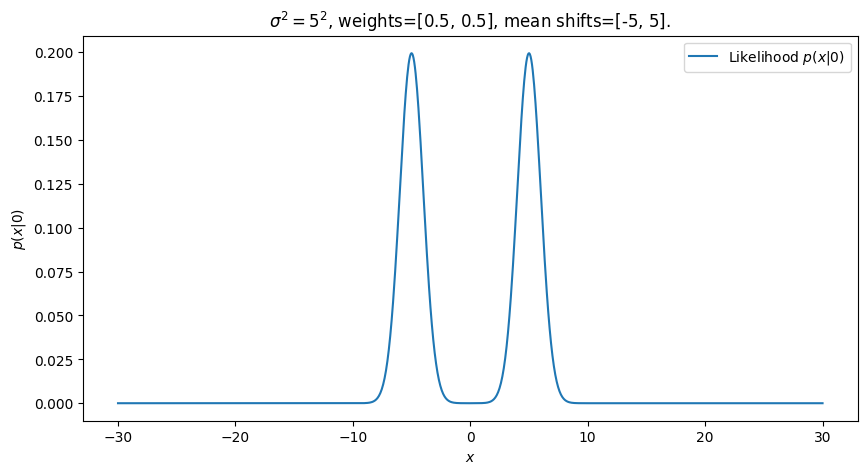

In [262]:
x = np.linspace(-30,30,1000)
theta = 0
fig, ax = plt.subplots(figsize=(10,5))
label = fr"Likelihood $p(x|{theta})$"
ax.plot(x, likelihood(x, theta, weights, mean_shifts), label=label)
ax.set_xlabel(r"$x$")
ax.set_ylabel(fr"$p(x|{theta})$")
ax.set_title(fr"$\sigma^2 = {sigma}^2$, weights={weights}, mean shifts={mean_shifts}.")
plt.legend()

### Posterior Plot

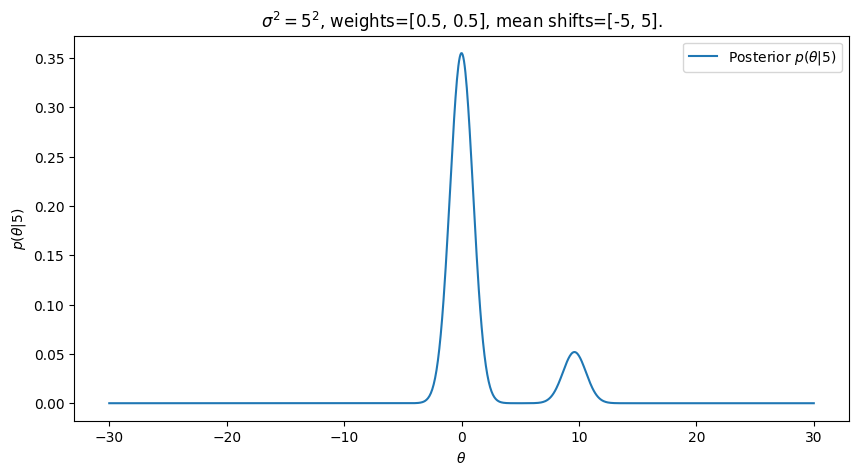

In [260]:
theta = np.linspace(-30,30,1000)
x = 5
fig, ax = plt.subplots(figsize=(10,5))
label = fr"Posterior $p(\theta|{x})$"
ax.plot(theta, posterior(theta, x, weights, mean_shifts), label=label)
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(fr"$p(\theta|{x})$")
ax.set_title(fr"$\sigma^2 = {sigma}^2$, weights={weights}, mean shifts={mean_shifts}.")
plt.legend()